In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

import pandas_profiling

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [2]:
train = pd.read_csv('train.csv').set_index('Id')
test = pd.read_csv('test.csv').set_index('Id')
test['SalePrice'] = -1
#df = pd.concat([train,test], axis=0)

In [ ]:
train.head()

In [ ]:
pandas_profiling.ProfileReport(train)

In [3]:
df = train.copy()
target_column = 'SalePrice'
old_max = pd.options.display.max_rows
pd.options.display.max_rows = len(df.columns)
dtype_df = pd.DataFrame({"Column Name": df.dtypes.index,"DType": df.dtypes.values})
display(dtype_df)
pd.options.display.max_rows = old_max

,Column Name,DType
0,MSSubClass,int64
1,MSZoning,object
2,LotFrontage,float64
3,LotArea,int64
4,Street,object
5,Alley,object
6,LotShape,object
7,LandContour,object
8,Utilities,object
9,LotConfig,object


NameError: name 'old_max' is not defined

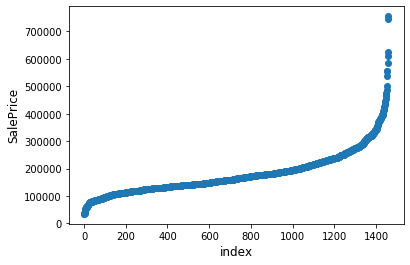

In [4]:
display(HTML("<h2>Plot Scatter Target</h2>"))
display(HTML("<p>Below is a sorted scatter plot of the values in the target column</p>"))

plt.scatter(range(df[target_column].shape[0]), np.sort(df[target_column].values))
plt.xlabel('index', fontsize=12)
plt.ylabel(target_column, fontsize=12)
plt.show()

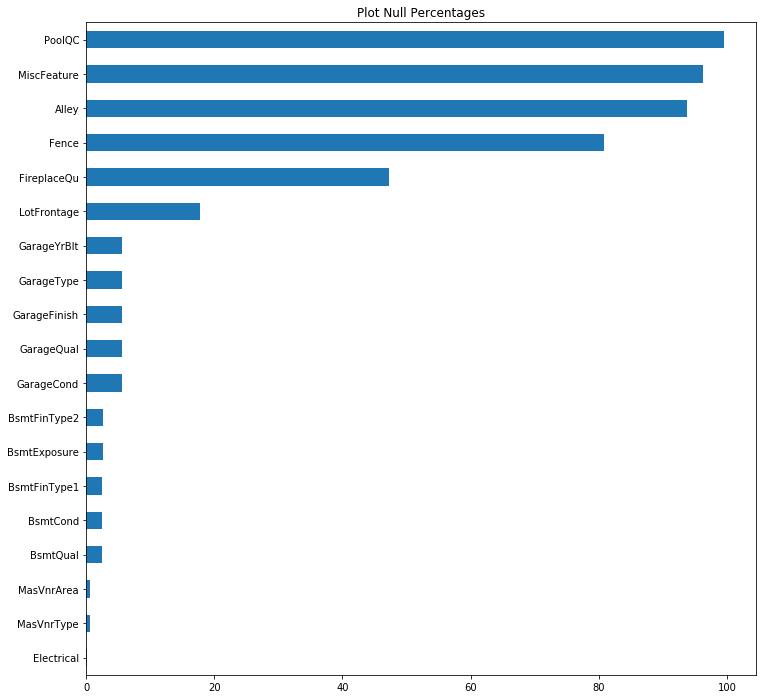

In [6]:
display(HTML("<h2>Plot Nulls</h2>"))

null_percentage = df.isnull().sum()/df.shape[0]*100
null_percentage_filtered = null_percentage[null_percentage > 0].sort_values()

if len(null_percentage_filtered) > 0:
    display(HTML("<p>The plot below shows the percentage of NaNs in each column in the dataframe</p>"))
    null_percentage_filtered.plot(kind='barh', figsize=(12,12), title="Plot Null Percentages")
    plt.show()
else:
    display(HTML("<p>The dataframe does not contain any missing data</p>"))


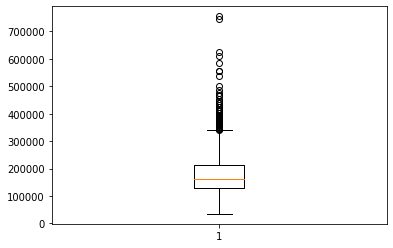

In [15]:
display(HTML("<h2>Plot Histogram Target</h2>"))
display(HTML("<p>Below is a histogram of the values in the target column</p>"))


df[target_column].values

#df.plot.box() 
plt.boxplot(df[target_column]) 
plt.show() 

In [12]:
df[target_column].values

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [ ]:
#OTHER TOOLS

#Transpose Dataset
result = df.pivot(index='ID', columns ='Product',values='Sales')

#Sort
df.sort(['Product','Sales'],ascending=[True,False])

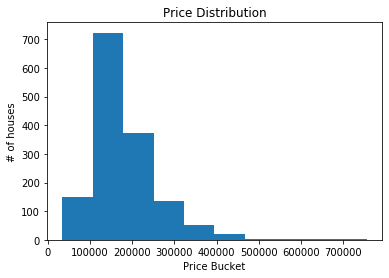

In [16]:
#Easy Histogram
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['SalePrice'],bins=10)
plt.title('Price Distribution')
plt.xlabel('Price Bucket')
plt.ylabel('# of houses')
plt.show()

In [17]:
#Frequency Tables
prueba = df.groupby(['Neighborhood','Fence'])
prueba.size()

Neighborhood  Fence
Blueste       GdPrv     2
BrkSide       GdPrv     4
              GdWo      2
              MnPrv     6
              MnWw      1
ClearCr       GdWo      1
              MnPrv     2
CollgCr       GdPrv     3
              GdWo      2
              MnPrv    13
Crawfor       GdPrv     3
              GdWo      2
              MnPrv     8
Edwards       GdPrv     6
              GdWo      2
              MnPrv    15
Gilbert       GdPrv     1
              MnPrv     1
IDOTRR        GdPrv     1
              GdWo      2
              MnPrv    10
MeadowV       GdPrv     1
              GdWo      1
              MnPrv     2
Mitchel       GdPrv     4
              GdWo      1
              MnPrv     9
NAmes         GdPrv    12
              GdWo     26
              MnPrv    26
              MnWw      8
NWAmes        GdPrv     6
              GdWo      3
              MnPrv    15
NoRidge       GdPrv     1
              MnPrv     1
OldTown       GdPrv     4
              GdWo

In [20]:
df.isnull()
value_to_fill = np.mean(df.LotFrontage)
df.LotFrontage = df.LotFrontage.fillna(value_to_fill)